In [34]:
import matplotlib.pyplot as plt
import numpy as np

# from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import california_housing
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    ReLU,
    Softmax,
)
from keras.losses import MeanSquaredError
from keras.metrics import MeanSquaredError
from keras.models import Sequential
from keras.optimizers import Adam

# from keras.utils import plot_model

In [35]:
(X_train, y_train), (X_test, y_test) = california_housing.load_data()

In [36]:
X_train.shape

(16512, 8)

In [37]:
X_test.shape

(4128, 8)

In [38]:
y_train.shape

(16512,)

In [39]:
y_test.shape

(4128,)

In [40]:
X_train

array([[-118.27  ,   34.09  ,   52.    , ..., 1048.    ,  491.    ,
           3.7847],
       [-118.36  ,   33.96  ,   21.    , ..., 1286.    ,  557.    ,
           2.7284],
       [-122.39  ,   37.76  ,   52.    , ...,  712.    ,  398.    ,
           3.9722],
       ...,
       [-122.34  ,   37.57  ,   52.    , ...,  876.    ,  359.    ,
           8.2598],
       [-122.18  ,   37.89  ,   18.    , ..., 1634.    ,  734.    ,
           8.1489],
       [-118.43  ,   34.2   ,   29.    , ..., 1942.    ,  679.    ,
           3.1118]], dtype=float32)

In [41]:
y_train

array([252300., 146900., 290900., ..., 500001., 499000., 238100.],
      dtype=float32)

In [42]:
model = Sequential(
    layers=[
        Input(shape=(8,)),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(32),
        ReLU(),
        Dense(1),
    ],
    name="ann",
)

In [43]:
model.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss="mse", optimizer=Adam(), metrics=["mse"])

In [45]:
ann_history = model.fit(
    X_train, y_train, batch_size=32, epochs=20, validation_split=0.2
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 38249050112.0000 - mse: 38249050112.0000 - val_loss: 23823638528.0000 - val_mse: 23823638528.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 19366680576.0000 - mse: 19366680576.0000 - val_loss: 11682587648.0000 - val_mse: 11682587648.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 11294241792.0000 - mse: 11294241792.0000 - val_loss: 10732823552.0000 - val_mse: 10732823552.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 10673186816.0000 - mse: 10673186816.0000 - val_loss: 10350903296.0000 - val_mse: 10350903296.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 10447392768.0000 - mse: 10447392768.0000 - val_loss: 9883741184.0000 - val_mse: 9883741184.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 9936207872.0000 - mse: 9936207872.0000 - val_loss: 9378040832.0000 - val_mse: 9378040832.0000
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 713

In [46]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["mse"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_mse"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 9465058688.0
Validation loss: 8742597324.8
9465058688.000000 Training accuracy with a standard deviation of 5183832911.607007
8742597324.799999 Validation accuracy with a standard deviation of 3848083738.880279


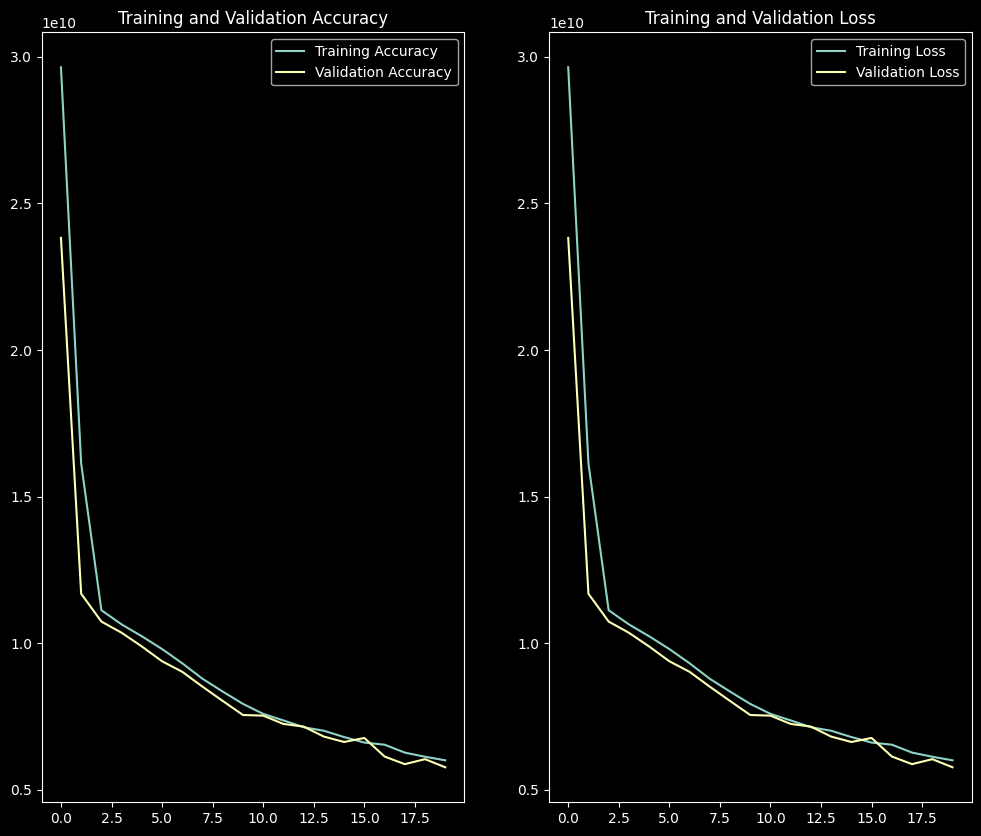

In [47]:
epochs_range = range(20)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/california_ann_acc_loss.png", bbox_inches="tight")

In [48]:
ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 6076718080.0000 - mse: 6076718080.0000
Test loss: 5868645376.0
Test accuracy: 5868645376.0


In [49]:
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
